# **Extractive Text Summarization of News Articles using T5-Base Model**
## Project Description :
#### This project aims to develop an extractive text summarization model for news articles using the T5-Base model. The dataset comprises 417 news articles from various topics, with each article paired with five human-generated summaries. The objective is to create a model that can automatically generate concise summaries from input news articles by identifying and extracting the most important information.

#### The T5 (Text-to-Text Transfer Transformer) model is a versatile text-to-text architecture that can be fine-tuned for multiple natural language processing (NLP) tasks, including summarization. In this project, the 't5-base' variant of the model is fine-tuned for extractive summarization of news articles.

# **Installing Required Libraries**

In [1]:
!pip install -U transformers
!pip install -U datasets
!pip install tensorboard
!pip install sentencepiece
!pip install accelerate
!pip install evaluate
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.0 MB/s

## **Importing Libraries and Model for Text Summarization**

In [7]:
import torch
import pprint
import numpy as np

from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset

In [6]:
# Install the evaluate package using the %pip magic command.
!pip install evaluate
import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is

# **Loading the BBC News Summary Dataset**

In [8]:
import pandas as pd

dataset = load_dataset('gopalkalpande/bbc-news-summary', split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

bbc-news-summary.csv:   0%|          | 0.00/7.32M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2224 [00:00<?, ? examples/s]

In [9]:
dataset

Dataset({
    features: ['File_path', 'Articles', 'Summaries'],
    num_rows: 2224
})

In [15]:
dataset[:10] # Display the first 10 rows of the dataset

{'File_path': ['politics',
  'politics',
  'politics',
  'politics',
  'politics',
  'politics',
  'politics',
  'politics',
  'politics',
  'politics'],
 'Articles': ['Budget to set scene for election..Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour...Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare...- Increase in the stamp duty threshold from £60,000. - A freeze on petrol duty. - An extension of tax credit scheme for poorer families. - Possible help for pensioners The stamp duty threshold rise is intend

# **Splitting the Dataset into Training and Testing Sets**

In [10]:
full_dataset = dataset.train_test_split(test_size=0.2, shuffle=True)

In [11]:
dataset_train = full_dataset['train']
dataset_valid = full_dataset['test']

# **Preparing DataFrames for Exploratory Data Analysis (EDA)**

In [18]:
df1 = pd.DataFrame(dataset_train)
df2 = pd.DataFrame(dataset_valid)

# Concatenate the datasets for overall EDA
df = pd.concat([df1, df2])

In [20]:
df.head()

,File_path,Articles,Summaries,article_length
0,business,Disaster claims 'less than $10bn'..Insurers ha...,The impact on US insurance companies is not ex...,4043
1,sport,Hodges announces rugby retirement..Scarlets an...,"The 36-year-old, who has 54 caps, was Llanelli...",1690
2,entertainment,"Top stars join US tsunami TV show..Brad Pitt, ...",George Clooney recently reacted angrily to a T...,2296
3,business,Qwest may spark MCI bidding war..US phone comp...,Qwest said on Wednesday that MCI had rejected ...,2406
4,business,Russia WTO talks 'make progress'..Talks on Rus...,While pinpointing several areas in which there...,1630


# **Visualizing the Distribution of Article Lengths**

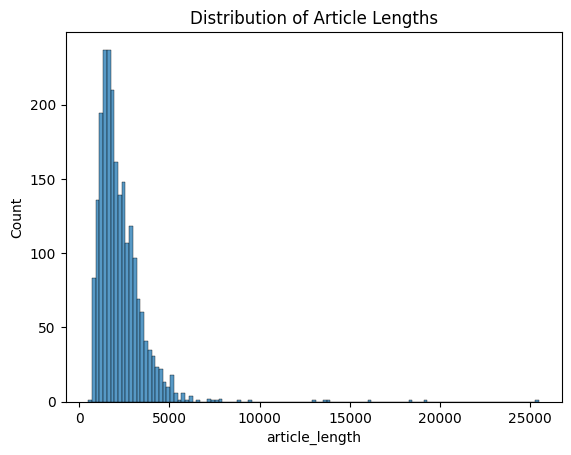

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
df['article_length'] = df['Articles'].apply(len)
sns.histplot(df['article_length'])
plt.title('Distribution of Article Lengths')
plt.show()

# **Visualizing the Distribution of Summary Lengths**

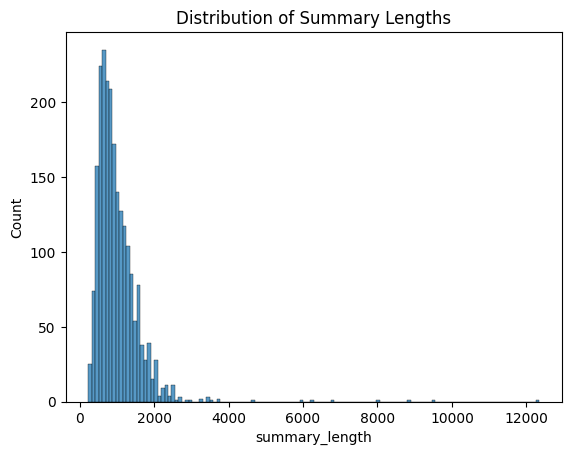

In [23]:
#  Distribution of summary lengths
df['summary_length'] = df['Summaries'].apply(len)
sns.histplot(df['summary_length'])
plt.title('Distribution of Summary Lengths')
plt.show()

# **Calculating Summary Statistics for Article and Summary Lengths**

In [27]:
import numpy as np

# Assuming you have the combined DataFrame 'df' from the previous example

average_article_length = np.mean(df['article_length'])
average_summary_length = np.mean(df['summary_length'])

max_article_length = np.max(df['article_length'])
min_article_length = np.min(df['article_length'])

max_summary_length = np.max(df['summary_length'])
min_summary_length = np.min(df['summary_length'])

print(f"Average Article Length: {average_article_length:.2f}")
print(f"Average Summary Length: {average_summary_length:.2f}")

print(f"Maximum Article Length: {max_article_length}")
print(f"Minimum Article Length: {min_article_length}")
print(f"Maximum Summary Length: {max_summary_length}")
print(f"Minimum Summary Length: {min_summary_length}")

Average Article Length: 2263.91
Average Summary Length: 1000.46
Maximum Article Length: 25484
Minimum Article Length: 502
Maximum Summary Length: 12344
Minimum Summary Length: 227


# **Visualizing the Number of Articles base on domain**

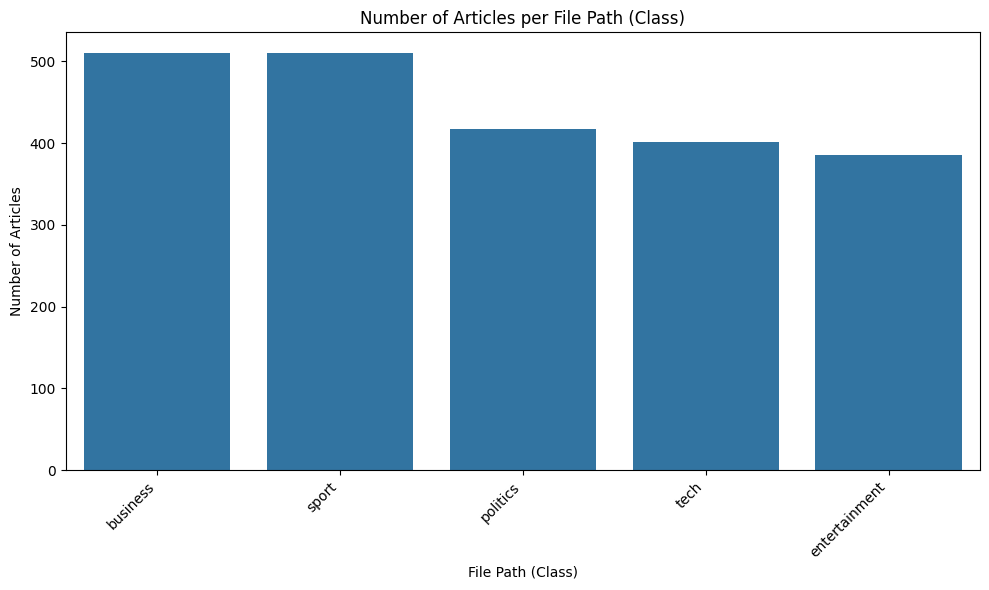

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Count the occurrences of each file path
file_path_counts = df['File_path'].value_counts()

# 2. Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=file_path_counts.index, y=file_path_counts.values)
plt.title('Number of Articles per File Path (Class)')
plt.xlabel('File Path (Class)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **Loading the T5 Model and Tokenizer**

In [12]:
MODEL = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(MODEL)
model = T5ForConditionalGeneration.from_pretrained(MODEL)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# **Setting Hyperparameters for Training**

In [13]:
BATCH_SIZE = 4
NUM_PROCS = 4
EPOCHS = 8
OUT_DIR = 'results_t5base'
MAX_LENGTH = 512

# **Preprocessing the Dataset for Model Training**

In [14]:
# Function to convert text data into model inputs and targets
def preprocess_function(examples):
    inputs = [f"summarize: {article}" for article in examples['Articles']]
    model_inputs = tokenizer(
        inputs,
        max_length=MAX_LENGTH,
        truncation=True,
        padding='max_length'
    )

    # Set up the tokenizer for targets
    targets = [summary for summary in examples['Summaries']]
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=MAX_LENGTH,
            truncation=True,
            padding='max_length'
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


tokenized_train = dataset_train.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS
)
tokenized_valid = dataset_valid.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS
)

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=4):   0%|          | 0/1779 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword ar

Map (num_proc=4):   0%|          | 0/445 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

In [36]:
tokenized_train

Dataset({
    features: ['File_path', 'Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1779
})

In [37]:
print(tokenized_train[0])

{'File_path': 'business', 'Articles': 'Disaster claims \'less than $10bn\'..Insurers have sought to calm fears that they face huge losses after an earthquake and giant waves killed at least 38,000 people in southern Asia...Munich Re and Swiss Re, the world\'s two biggest reinsurers, have said exposure will be less than for other disasters. Rebuilding costs are likely to be cheaper than in developed countries, and many of those affected will not have insurance, analysts said. Swiss Re has said total claims are likely to be less than $10bn (£5.17bn). Swiss Re believes that the cost would be substantial but that it is unlikely to be in double-digit billions, the Financial Times reported. Munich Re, the world\'s largest reinsurance company, said that its exposure is less than 100m euros (£70m; $136m)...At least 10 countries have been affected, with Sri Lanka, Indonesia, India and Thailand among the worst hit. The region\'s resorts and Western tourists are expected to be among the main clai

# **Loading the Model and Checking Parameters**

In [15]:
model = T5ForConditionalGeneration.from_pretrained(MODEL)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

222,903,552 total parameters.
222,903,552 training parameters.


# **Installing and Loading the ROUGE Score Evaluation**

In [17]:
!pip install rouge_score # Install the rouge_score package
import evaluate # make sure to import the evaluate library

rouge = evaluate.load("rouge")

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=67725509d1c3dfa00172eee4939a02b0f7ee8e8357a742a36137b9db732c1309
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


# **Compute ROUGE Metrics**

In [18]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred.predictions[0], eval_pred.label_ids

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True,
        rouge_types=[
            'rouge1',
            'rouge2',
            'rougeL'
        ]
    )

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

# **Preprocessing Logits for Metrics Calculation**

In [19]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits[0], dim=-1)
    return pred_ids, labels

# **Setting Up Training Arguments and Trainer**

In [20]:
training_args = TrainingArguments(
    output_dir=OUT_DIR,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=OUT_DIR,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=200,
    save_strategy='epoch',
    save_total_limit=2,
    report_to='tensorboard',
    learning_rate=0.0001,
    dataloader_num_workers=4
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    preprocess_logits_for_metrics=preprocess_logits_for_metrics,
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# **Training the Model**

In [21]:
 trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Gen Len
200,0.445600,0.418498,0.896600,0.822300,0.875500,233.444900
400,0.407300,0.371241,0.903900,0.833000,0.885000,233.952800
600,0.399300,0.358520,0.907300,0.836600,0.887700,233.952800
800,0.377700,0.345350,0.908800,0.840000,0.889900,233.952800
1000,0.403000,0.341461,0.910400,0.842200,0.891600,233.952800
1200,0.217200,0.336722,0.912300,0.844700,0.893600,233.952800
1400,0.265100,0.335624,0.912300,0.844900,0.893300,233.952800
1600,0.353800,0.334163,0.912900,0.846300,0.894400,233.952800
1800,0.272600,0.334086,0.913700,0.847300,0.895100,233.952800
2000,0.149300,0.332119,0.913500,0.847900,0.895300,233.952800


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: Runtime

TrainOutput(global_step=3560, training_loss=0.503152197867297, metrics={'train_runtime': 6094.7331, 'train_samples_per_second': 2.335, 'train_steps_per_second': 0.584, 'total_flos': 8666688698449920.0, 'train_loss': 0.503152197867297, 'epoch': 8.0})

# **Saving the Tokenizer**

In [22]:
tokenizer.save_pretrained(OUT_DIR)

('results_t5base/tokenizer_config.json',
 'results_t5base/special_tokens_map.json',
 'results_t5base/spiece.model',
 'results_t5base/added_tokens.json')

In [23]:
!zip -r {OUT_DIR} {OUT_DIR}

  adding: results_t5base/ (stored 0%)
  adding: results_t5base/special_tokens_map.json (deflated 85%)
  adding: results_t5base/added_tokens.json (deflated 83%)
  adding: results_t5base/checkpoint-3115/ (stored 0%)
  adding: results_t5base/checkpoint-3115/model.safetensors (deflated 8%)
  adding: results_t5base/checkpoint-3115/rng_state.pth (deflated 25%)
  adding: results_t5base/checkpoint-3115/generation_config.json (deflated 30%)
  adding: results_t5base/checkpoint-3115/scheduler.pt (deflated 55%)
  adding: results_t5base/checkpoint-3115/trainer_state.json (deflated 83%)
  adding: results_t5base/checkpoint-3115/training_args.bin (deflated 51%)
  adding: results_t5base/checkpoint-3115/config.json (deflated 63%)
  adding: results_t5base/checkpoint-3115/optimizer.pt (deflated 8%)
  adding: results_t5base/tokenizer_config.json (deflated 94%)
  adding: results_t5base/events.out.tfevents.1727038321.19c4db0ec622.1196.0 (deflated 69%)
  adding: results_t5base/spiece.model (deflated 48%)
  ad

In [24]:
!wget "https://www.dropbox.com/scl/fi/561r8pfhem4lu70hf438q/inference_data.zip?rlkey=aedt2saqmmp3a67qc4o34k04y&dl=1" -O inference_data.zip

--2024-09-22 22:41:41--  https://www.dropbox.com/scl/fi/561r8pfhem4lu70hf438q/inference_data.zip?rlkey=aedt2saqmmp3a67qc4o34k04y&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9ab80b075657ecbc40f5569aa.dl.dropboxusercontent.com/cd/0/inline/CbEN0CJ74j3N8IcRA5b-aABKT67BamFimqeSdajaWWf4LeUtDtdAH5LbPMKHTxxtxnk9W0wDey2UPJjzaplsBRAV8d-QZwXdmcxoXw9YEKz1HGKt2DA6zWU7-sBMAqeCIGIFMFINGRrEmVhCHEEoXFsK/file?dl=1# [following]
--2024-09-22 22:41:42--  https://ucf9ab80b075657ecbc40f5569aa.dl.dropboxusercontent.com/cd/0/inline/CbEN0CJ74j3N8IcRA5b-aABKT67BamFimqeSdajaWWf4LeUtDtdAH5LbPMKHTxxtxnk9W0wDey2UPJjzaplsBRAV8d-QZwXdmcxoXw9YEKz1HGKt2DA6zWU7-sBMAqeCIGIFMFINGRrEmVhCHEEoXFsK/file?dl=1
Resolving ucf9ab80b075657ecbc40f5569aa.dl.dropboxusercontent.com (ucf9ab80b075657ecbc40f5569aa.dl.dropboxusercontent.com)...

In [25]:
!unzip inference_data.zip

Archive:  inference_data.zip
  inflating: inference_data/file_1.txt  
  inflating: inference_data/file_2.txt  


# **Summarization Function for text summarization**

In [26]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

import glob

In [34]:
model_path = "results_t5base/checkpoint-3560"  # Adjust the path to your model
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained("t5-base") # Load tokenizer from the base model

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [35]:
def summarize_text(text, model, tokenizer, max_length=512, num_beams=5):
    # Preprocess the text
    inputs = tokenizer.encode(
        "summarize: " + text,
        return_tensors='pt',
        max_length=max_length,
        truncation=True
    )

    # Generate the summary
    summary_ids = model.generate(
        inputs,
        max_length=50,
        num_beams=num_beams,
        # early_stopping=True,
    )

    # Decode and return the summary
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# **Summarizing Text Files Using the Trained T5 Model**

In [37]:
import glob
import pprint


pp = pprint.PrettyPrinter(indent=4)

for file_path in glob.glob('inference_data/*.txt'):
    file = open(file_path)
    text = file.read()
    summary = summarize_text(text, model, tokenizer)
    pp.pprint(summary) # Use pp to print
    print('-'*75)

('Sam Altman — the leader of one of the world’s most influential AI companies, '
 'OpenAI, and perhaps the most visible figure in the space — was fired Friday '
 'night by the startup’s board in a surprise move.')
---------------------------------------------------------------------------
('Brockmann quit as OpenAI president after Altman was fired. Microsoft has '
 'hired Sam Altman to power up its innovation in artificial intelligence after '
 'the co-founder of OpenAI was ousted as CEO in a chaotic boardroom coup on '
 'Friday')
---------------------------------------------------------------------------


# **The Text of News Article**

In [38]:
text

'Microsoft has hired Sam Altman to power up its innovation in artificial intelligence after the co-founder of OpenAI was ousted as CEO in a chaotic boardroom coup on Friday. Meanwhile, the ChatGPT company will get its third CEO in three days.\n\nIt’s another major shakeup to the balance of power over artificial intelligence, the most significant new technology in decades.\n\nGreg Brockman, another co-founder of OpenAI, is also joining Microsoft (MSFT) — the startup’s biggest financial backer. Brockmann quit as OpenAI president after Altman was fired.\n\nEmmett Shear, the former CEO of Amazon’s streaming service Twitch, will join OpenAI as interim CEO. He replaces Mira Murati, who was named interim CEO when Altman was fired. She will return to her role as OpenAI’s chief technology officer.\n\n“We look forward to getting to know Emmett Shear,” Microsoft CEO Satya Nadella said in a post on X, formerly known as Twitter. “And we’re extremely excited to share the news that Sam Altman and Gre

# **The Summary of News Article**

In [39]:
summary

'Brockmann quit as OpenAI president after Altman was fired. Microsoft has hired Sam Altman to power up its innovation in artificial intelligence after the co-founder of OpenAI was ousted as CEO in a chaotic boardroom coup on Friday'

The project successfully demonstrates the model's ability to generate coherent and relevant summaries, providing a foundation for real-world applications in news aggregation and content curation. Future work includes enhancing model capabilities and integrating it into web applications for real-time use.